# Prediction of car prices based on regression analysis using data from the web site https://kolesa.kz

In [ ]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##  Web scrapping part

In [ ]:
max_page = 196 #number of pages used
pages = [] #empty list to append page URLs

for x in range(1, max_page + 1): #loop for running all pages
    if x == 1:
        pages.append('https://kolesa.kz/cars/toyota/camry/?auto-emergency=1&auto-run[to]=500000')
    else:
        pages.append('https://kolesa.kz/cars/toyota/camry/?auto-emergency=1&auto-run[to]=500000&page=' + str(x) )

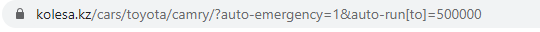

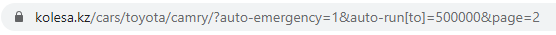

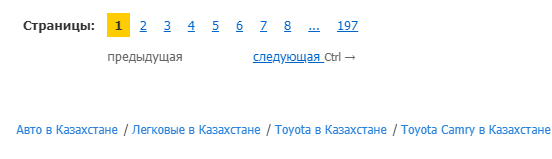

In [218]:
X = [] #empty lists to append car information
y = []

In [219]:
for url in pages: #loop that goes to every page
    page = requests.get(url)
    
    soup = BS(page.content, 'html.parser') 
    carHTML = soup.findAll('div', class_="a-info-top") #get information as in the photo below
    carinfoHTML = soup.findAll('div', class_="a-search-description")
    
    for i in range(0, 20): 
        temp1 = carHTML[i].get_text().replace('\n', '').replace(' ', '').replace('\xa0', '').split('.')
        #Extracting text related to the price of the car
        #and removing unnecessary parts and splitting by dot
        
        temp2 = carinfoHTML[i].get_text().replace('\n', '').replace(' ', '').split(',')
        #Extracting text related to the main information of the car
        #and removing unnecessary parts and splitting by comma
        
        X.append([temp2[0], temp2[2], temp2[5]])
        y.append(temp1[1] )

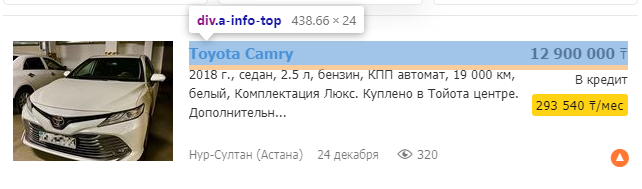

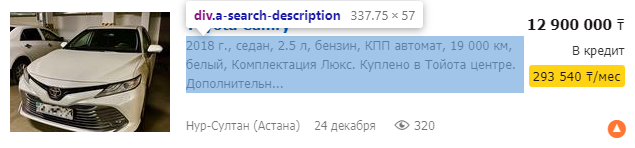

In [220]:
print(X)
print(y)

[['2019г.', '2.5л', '2500км'], ['2016г.', '2.5л', '37000км'], ['2019г.', '3.5л', '2000км'], ['2019г.', '2.5л', '18900км'], ['2011г.', '2.5л', '178000км'], ['2012г.', '2.5л', '185000км'], ['2014г.', '2.5л', '80000км'], ['2019г.', '2.5л', '10000км'], ['2008г.', '2.4л', '140000км'], ['2008г.', '2.4л', '199000км'], ['2013г.', '2.5л', '99001км'], ['2012г.', '2.5л', '170км'], ['1998г.', '3л', '287000км'], ['2007г.', '2.4л', '201650км'], ['2019г.', '2.5л', '2253км'], ['2002г.', '3л', '308207км'], ['2011г.', '2.5л', '160000км'], ['2015г.', '2л', '82000км'], ['2019г.', '2л', '11000км'], ['2003г.', '3.3л', '286000км'], ['2019г.', '2.5л', '2000км'], ['2007г.', '2.4л', '197948км'], ['2014г.', '2.5л', '114000км'], ['2007г.', '2.4л', '110км'], ['2014г.', '2л', '135000км'], ['2018г.', '2.5л', '10300км'], ['2012г.', '2.5л', '176000км'], ['2014г.', '2.5л', '68000км'], ['2014г.', '2.5л', '70000км'], ['2017г.', '2.5л', '87000км'], ['2016г.', '2.5л', '38121км'], ['2017г.', '2.5л', '32000км'], ['2009г.', '

## Delete unnecessary characters 

In [221]:
for element in X: 
    try:
        element[0] = int(element[0].replace('г.',''))
        element[1] = float(element[1].replace('л',''))
        element[2] = int(element[2].replace('км',''))
    except ValueError:
        pass

In [131]:
print(X)

[[2018, 2.5, 10300], [2012, 2.5, 176000], [2019, 2.5, 2], [2014, 2.5, 68000], [2014, 2.5, 70000], [2017, 2.5, 87000], [2016, 2.5, 38121], [2017, 2.5, 32000], [2009, 2.5, 122000], [2012, 2.5, 110000], [2012, 2.5, 170000], [2019, 2.5, 19000], [2015, 2.5, 91000], [2019, 3.5, 17652], [2018, 2.5, 31438], [2019, 2.5, 16709], [2017, 2.5, 60241], [2019, 2.5, 10332], [2007, 2.4, 181000], [2013, 2.0, 67000], [2017, 2.5, 110], [2013, 2.5, 131000], [2008, 2.4, 80000], [2006, 2.4, 220003], [2002, 2.4, 204000], [2019, 2.5, 29700], [2013, 2.0, 98000], [2018, 2.5, 15000], [2002, 3.0, 270369], [2014, 2.5, 93000], [2007, 2.4, 20000], [2007, 2.4, 162483], [2008, 2.4, 165000], [2019, 3.5, 15000], [2012, 2.5, 88999], [2010, 2.5, 209214], [2002, 3.0, 190000], [2011, 2.5, 90000], [2018, 2.5, 15000], [2006, 2.4, 265541], [2019, 2.5, 4295], [2012, 2.5, 120000], [2017, 2.5, 64000], [2019, 2.5, 2], [2011, 2.5, 85000], [2016, 2.5, 87700], [2007, 2.4, 243010], [2018, 2.5, 34500], [2013, 2.5, 130000], [2019, 2.5, '

In [222]:
for i in range(len(y)):
    y[i] = int(y[i].replace('₸',''))

In [223]:
print(X)
print(y)

[[2019, 2.5, 2500], [2016, 2.5, 37000], [2019, 3.5, 2000], [2019, 2.5, 18900], [2011, 2.5, 178000], [2012, 2.5, 185000], [2014, 2.5, 80000], [2019, 2.5, 10000], [2008, 2.4, 140000], [2008, 2.4, 199000], [2013, 2.5, 99001], [2012, 2.5, 170], [1998, 3.0, 287000], [2007, 2.4, 201650], [2019, 2.5, 2253], [2002, 3.0, 308207], [2011, 2.5, 160000], [2015, 2.0, 82000], [2019, 2.0, 11000], [2003, 3.3, 286000], [2019, 2.5, 2000], [2007, 2.4, 197948], [2014, 2.5, 114000], [2007, 2.4, 110], [2014, 2.0, 135000], [2018, 2.5, 10300], [2012, 2.5, 176000], [2014, 2.5, 68000], [2014, 2.5, 70000], [2017, 2.5, 87000], [2016, 2.5, 38121], [2017, 2.5, 32000], [2009, 2.5, 122000], [2012, 2.5, 110000], [2012, 2.5, 170000], [2019, 2.5, 19000], [2015, 2.5, 91000], [2019, 3.5, 17652], [2018, 2.5, 31438], [2019, 2.5, 16709], [2017, 2.5, 60241], [2019, 2.5, 10332], [2007, 2.4, 181000], [2013, 2.0, 67000], [2017, 2.5, 110], [2013, 2.5, 131000], [2008, 2.4, 80000], [2006, 2.4, 220003], [1994, 3.0, 320000], [2002, 2.

## Creating a dataframe

In [224]:
df = pd.DataFrame(X,columns=['year','volume','range'])
df['price'] = y
df

,year,volume,range,price
0,2019,2.5,2500,11100000
1,2016,2.5,37000,9700000
2,2019,3.5,2000,17000000
3,2019,2.5,18900,11200000
4,2011,2.5,178000,6950000
5,2012,2.5,185000,7000000
6,2014,2.5,80000,7100000
7,2019,2.5,10000,12050000
8,2008,2.4,140000,4100000
9,2008,2.4,199000,4500000


In [247]:
res = df[pd.to_numeric(df['range'], errors='coerce').notnull()] #delete rows where there is no int value
res['range'] = res['range'].astype(int)
res = res[res['range'] > 10000] #take rowss where range more than 10 000
print(res)

      year  volume   range     price
1     2016     2.5   37000   9700000
3     2019     2.5   18900  11200000
4     2011     2.5  178000   6950000
5     2012     2.5  185000   7000000
6     2014     2.5   80000   7100000
8     2008     2.4  140000   4100000
9     2008     2.4  199000   4500000
10    2013     2.5   99001   4900000
12    1998     3.0  287000   4000001
13    2007     2.4  201650   5000000
15    2002     3.0  308207   3600000
16    2011     2.5  160000   4000000
17    2015     2.0   82000   8500000
18    2019     2.0   11000  10350000
19    2003     3.3  286000   4000000
21    2007     2.4  197948   4300000
22    2014     2.5  114000   5900000
24    2014     2.0  135000   7500000
25    2018     2.5   10300  13300000
26    2012     2.5  176000   7100000
27    2014     2.5   68000   8800000
28    2014     2.5   70000   8150000
29    2017     2.5   87000  10000000
30    2016     2.5   38121  11000000
31    2017     2.5   32000   9900000
32    2009     2.5  122000   3700000
3

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Plot some addictions

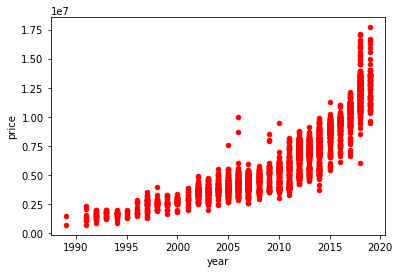

In [248]:
res.plot(kind='scatter',x='year',y='price',color='red')
plt.show()

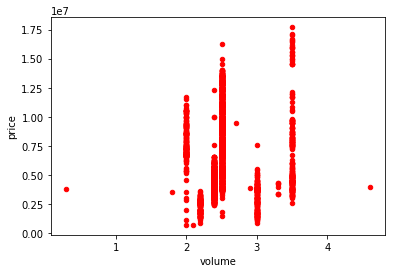

In [249]:
res.plot(kind='scatter',x='volume',y='price',color='red')
plt.show()

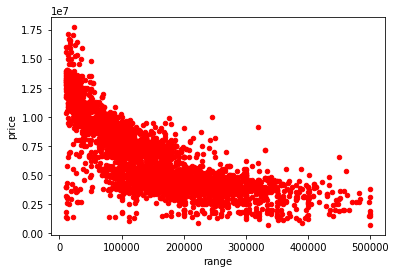

In [250]:
res.plot(kind='scatter',x='range',y='price',color='red')
plt.show()

In [251]:
res.dtypes

year        int64
volume    float64
range       int32
price       int64
dtype: object

In [252]:
dfs = np.split(res, [3], axis=1) #splitting dataset 

In [253]:
Xs = dfs[0].values.tolist()
print (Xs)

[[2016.0, 2.5, 37000.0], [2019.0, 2.5, 18900.0], [2011.0, 2.5, 178000.0], [2012.0, 2.5, 185000.0], [2014.0, 2.5, 80000.0], [2008.0, 2.4, 140000.0], [2008.0, 2.4, 199000.0], [2013.0, 2.5, 99001.0], [1998.0, 3.0, 287000.0], [2007.0, 2.4, 201650.0], [2002.0, 3.0, 308207.0], [2011.0, 2.5, 160000.0], [2015.0, 2.0, 82000.0], [2019.0, 2.0, 11000.0], [2003.0, 3.3, 286000.0], [2007.0, 2.4, 197948.0], [2014.0, 2.5, 114000.0], [2014.0, 2.0, 135000.0], [2018.0, 2.5, 10300.0], [2012.0, 2.5, 176000.0], [2014.0, 2.5, 68000.0], [2014.0, 2.5, 70000.0], [2017.0, 2.5, 87000.0], [2016.0, 2.5, 38121.0], [2017.0, 2.5, 32000.0], [2009.0, 2.5, 122000.0], [2012.0, 2.5, 110000.0], [2012.0, 2.5, 170000.0], [2019.0, 2.5, 19000.0], [2015.0, 2.5, 91000.0], [2019.0, 3.5, 17652.0], [2018.0, 2.5, 31438.0], [2019.0, 2.5, 16709.0], [2017.0, 2.5, 60241.0], [2019.0, 2.5, 10332.0], [2007.0, 2.4, 181000.0], [2013.0, 2.0, 67000.0], [2013.0, 2.5, 131000.0], [2008.0, 2.4, 80000.0], [2006.0, 2.4, 220003.0], [1994.0, 3.0, 320000

## Linear regression

In [255]:
from sklearn.model_selection import train_test_split  #Train test splitting

X_train, X_valid, y_train, y_valid = train_test_split(Xs, res['price'], test_size=0.3, random_state=0)

In [256]:
from sklearn.linear_model import LinearRegression #Linear regression coefficients
lr = LinearRegression ( fit_intercept = True ) 
lr.fit(X_train,y_train) 
print(lr.coef_) #a1a2a3
print(lr.intercept_) #a0

[ 3.58322723e+05  4.51858988e+05 -6.62364573e+00]
-713913089.4809719


In [257]:
y_pred = lr.predict(X_valid)

In [258]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 1099969.7780335317
Mean Squared Error: 2135119520373.9526
Root Mean Squared Error: 1461204.8180778602


In [313]:
difference = pd.DataFrame({'Difference': y_valid - y_pred})
difference = difference.apply(lambda x: '%.2f' % x, axis=1)

In [315]:
results = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred,})
results['Difference'] = difference
results.reset_index().drop(columns=['index'])

,Actual,Predicted,Difference
0,3500000,2.612606e+06,887394.22
1,8600000,8.593625e+06,6374.83
2,11250000,1.010648e+07,1143520.51
3,4300000,4.836233e+06,-536233.33
4,9500000,9.005017e+06,494983.26
5,3800000,6.504673e+06,-2704673.03
6,12300000,9.995057e+06,2304942.86
7,14500000,1.061745e+07,3882552.10
8,5000000,4.151229e+06,848770.85
9,6800000,7.631985e+06,-831984.51
